# Delving into more complex models

## Imports 

In [1]:
# System imports
import os
import sys
from pathlib import Path
# Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import imread
import seaborn as sn
import cv2
# Pytorch imports
import torch 
import torch.nn as nn
import torch.nn.functional as F
# Vision imports
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import WeightedRandomSampler

# Random
import random
# TQDM
import tqdm



os.chdir('..') 
print(os.getcwd())

from Scripts.data_setup import create_dataloaders
from Scripts.engine import *
# setting up device agnostics
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Setting number of works and directories for data
NUM_WORKERS = os.cpu_count()
TRAIN_DIR = "Data/train/"
TEST_DIR = "Data/test/"
DATA_DIR = "Data"




TRAINING_MODEL_NUMBER = 0

c:\Computational\Learning-Machine-Learning\PneumoniaCVProblem-1


c:\Computational\Learning-Machine-Learning\PneumoniaCVProblem-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_augmentation_transform = data_transforms_train = transforms.Compose([
        transforms.RandomRotation(20),  # Randomly rotate the image within a range of (-20, 20) degrees
        transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with 50% probability
        transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # Randomly crop the image and resize it
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Randomly change the brightness, contrast, saturation, and hue
        transforms.RandomApply([transforms.RandomAffine(0, translate=(0.1, 0.1))], p=0.5),  # Randomly apply affine transformations with translation
        transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2)], p=0.5),  # Randomly apply perspective transformations
        transforms.Resize(size=(256 ,256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])


test_data_transform = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

## Convolutional neural networks

So far we have only looked at simple feedward neural networks, we will now look at some CNN models - these will allow the network to capture some structure of the images.

As CNNs can easily cope with higher dimensional images we will also upsize to 256x256 image size.

## Model 5

Our first CNN will consist of 1 convolition layer of 16 filters, a max pool of 2x2 and then into a FFNN of 512 dense.

In [3]:
class CNNmodelv1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 128 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [4]:
if TRAINING_MODEL_NUMBER == 5:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv5 = CNNmodelv1()
    modelv5.to(DEVICE)


    loss_func_5 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv5,
                loss_func_5,
                epoches = 10
                )

    evalutation_model(modelv5, test_data, loss_func_5)


C:\Users\jackg\AppData\Local\Temp\ipykernel_24208\1158779927.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv5.load_state_dict(torch.load('Models/model_v5_weights

0.9187878787878788


As we see our 5th model got 89% accuracy and 92% f1 score - a massive improvement in the right direction.

## Model 6

Continuing our upwards trend we will now try a CNN with an additional convolution layer, so now we have 16 filters into 32 filters of 5x5x5, this leaves the size of the image after the 2 convolutions at 32 * 52 * 52.

In [5]:
class CNNmodelv2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 5, padding =2
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [6]:
if TRAINING_MODEL_NUMBER == 6:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv6 = CNNmodelv2()
    modelv6.to(DEVICE)


    loss_func_6 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv6,
                loss_func_6,
                epoches = 10
                )
    

    evalutation_model(modelv6, test_data, loss_func_6)


Failed to load model


C:\Users\jackg\AppData\Local\Temp\ipykernel_24208\1470829922.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv6.load_state_dict(torch.load('Models/model_v6_weights


* Accuracy - 87%
* F1 score - 90%

## Model 7 - succesively decreasing filter sizes instead.

In [7]:
class CNNmodelv3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 16, 5, padding =2
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

We will now try decrease the filter size while increasing the kernal size instead, the last one took forever to train and didn't seem to do any better then just the simple one convolutional layer.

In [8]:
if TRAINING_MODEL_NUMBER == 7:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv7 = CNNmodelv3()
    modelv7.to(DEVICE)


    loss_func_7 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv7,
                loss_func_7,
                epoches = 10
                )
    
    evalutation_model(modelv7, test_data, loss_func_7)


Failed to load model


C:\Users\jackg\AppData\Local\Temp\ipykernel_24208\3834569929.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv7.load_state_dict(torch.load('Models/model_v7_weights

Model didn't seem to perform well at all and trained at lot slower then other models.
* Accuracy - 84% 
* F1 score - 88%

# Model 8 

Returning to a more simple mode of 16(3) -> 32(3) -> Fc

In [9]:
class CNNmodelv4(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [10]:
if TRAINING_MODEL_NUMBER == 8:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv8 = CNNmodelv4()
    modelv8.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv8,
                loss_func_8,
                epoches = 10
                )
    
    evalutation_model(modelv8, test_data, loss_func_8)


Failed to load model


C:\Users\jackg\AppData\Local\Temp\ipykernel_24208\1731340132.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv8.load_state_dict(torch.load('Models/model_v8_weights

Good improvement 
* Accuracy - 89%
* F1Score - 91%

## Model 9

In [11]:
class CNNmodelv5(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [12]:
if TRAINING_MODEL_NUMBER == 9:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv9 = CNNmodelv5()
    modelv9.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv9,
                loss_func_8,
                epoches = 10
                )
    evalutation_model(modelv9, test_data, loss_func_8)


Failed to load model


C:\Users\jackg\AppData\Local\Temp\ipykernel_24208\3632832949.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv9.load_state_dict(torch.load('Models/model_v9_weights


* Accuracy - 88%
* F1SCore - 91%

## Balancing dataset - Model 10

We will now use a weighted sampler to give a better balance between our 2 classes, as currently the non-pnuomnia class is massively under represented. This should hopefully improve model performance.

cuda
Epoch: 1 | train_loss: 0.7657 | train_acc: 0.7214 | test_loss: 0.4629 | test_acc: 0.8083
Epoch: 2 | train_loss: 0.3012 | train_acc: 0.8779 | test_loss: 0.4132 | test_acc: 0.8203
Epoch: 3 | train_loss: 0.2528 | train_acc: 0.8982 | test_loss: 0.3590 | test_acc: 0.8625
Epoch: 4 | train_loss: 0.2263 | train_acc: 0.9127 | test_loss: 0.3890 | test_acc: 0.8297
Epoch: 5 | train_loss: 0.1946 | train_acc: 0.9253 | test_loss: 0.3197 | test_acc: 0.8745
Epoch: 6 | train_loss: 0.2067 | train_acc: 0.9255 | test_loss: 0.3146 | test_acc: 0.8589
Epoch: 7 | train_loss: 0.1769 | train_acc: 0.9339 | test_loss: 0.3591 | test_acc: 0.8542
Epoch: 8 | train_loss: 0.1826 | train_acc: 0.9352 | test_loss: 0.3180 | test_acc: 0.8609
Epoch: 9 | train_loss: 0.1709 | train_acc: 0.9358 | test_loss: 0.3086 | test_acc: 0.8953
Epoch: 10 | train_loss: 0.1614 | train_acc: 0.9407 | test_loss: 0.3186 | test_acc: 0.8677


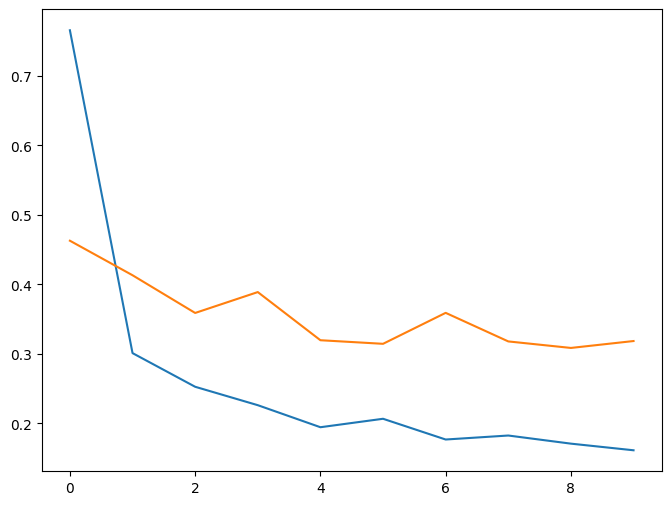

0.8900804289544236


In [13]:
if TRAINING_MODEL_NUMBER == 10:  # Labels of all samples in the dataset

    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS, sampler = True)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv10 = CNNmodelv5()
    modelv10.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv10,
                loss_func_8,
                epoches = 10
                )

    evalutation_model(modelv10, test_data, loss_func_8)


Small improvement with sampling 
* Accuracy - 89% 
* F1score - 89%